In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

In [3]:
# Read Excel file with two header rows
df = pd.read_excel("Master file.xlsx", sheet_name="KHALLIKOTE Block", header=[0, 1])

# Merge multi-index column names and remove 'Unnamed' entries
df.columns = [' '.join(col).strip().replace("Unnamed: ", "").strip() for col in df.columns]

# Drop the third row (numbering) and reset index and the last row the total one
df = df.iloc[1:-1].reset_index(drop=True)

# Drop the first column (S.No) if it exists
df = df.iloc[:, 1:]

In [4]:
df.head(3)

,Panchayat 1_level_1,No. of Registered Household,No. of Registered Persons,No. of Jobcard deleted in current YR Household,No. of Jobcard deleted in current YR Persons,No. of Jobcard included in current YR Household,No. of Jobcard included in current YR Persons,Cumulative No. of HH issued jobcards SCs,Cumulative No. of HH issued jobcards STs,Cumulative No. of HH issued jobcards Others,...,Employment offered Household,Employment offered Persons,Employment Availed Household,Employment Availed Persons,Employment Availed Total Persondays,Employment Availed Persondays of Central Liability,Employment Availed Persondays of States Liability,No. of Families Completed 100 days 21_level_1,No. of HH which are beneficiary of land reform/IAY 22_level_1,No. of Disabled beneficiary individuals 23_level_1
0,AITIPUR,567,752,63,182,25,29,15,0,550,...,284,303,250,262,16360,16360,0,13,0,0
1,BADAPALLI,991,1361,55,185,138,140,1,799,132,...,451,540,413,491,18220,18220,0,3,0,0
2,BADHI NUAPALLI,1295,2280,2,55,49,77,97,2,1192,...,223,264,189,214,4088,4088,0,0,0,0


In [5]:
df.rename(columns={
    'Panchayat 1_level_1': 'Panchayat',
    'No. of Families Completed 100 days 21_level_1': 'No. of Families Completed 100 days',
    'No. of HH which are beneficiary of land reform/IAY 22_level_1': 'No. of HH which are beneficiary of land reform/IAY',
    'No. of Disabled beneficiary individuals 23_level_1': 'No. of Disabled beneficiary individuals'
}, inplace=True)

In [6]:
df.columns

Index(['Panchayat', 'No. of Registered Household', 'No. of Registered Persons',
       'No. of Jobcard deleted in current YR Household',
       'No. of Jobcard deleted in current YR Persons',
       'No. of Jobcard included in current YR Household',
       'No. of Jobcard included in current YR Persons',
       'Cumulative No. of HH issued jobcards SCs',
       'Cumulative No. of HH issued jobcards STs',
       'Cumulative No. of HH issued jobcards Others',
       'Cumulative No. of HH issued jobcards Total',
       'Employment demanded Household', 'Employment demanded Persons',
       'Employment offered Household', 'Employment offered Persons',
       'Employment Availed Household', 'Employment Availed Persons',
       'Employment Availed Total Persondays',
       'Employment Availed Persondays of Central Liability',
       'Employment Availed Persondays of States Liability',
       'No. of Families Completed 100 days',
       'No. of HH which are beneficiary of land reform/IAY',
   

In [6]:
df.shape

(29, 23)

In [7]:
df.dtypes

Panchayat                                             object
No. of Registered Household                            int64
No. of Registered Persons                              int64
No. of Jobcard deleted in current YR Household         int64
No. of Jobcard deleted in current YR Persons           int64
No. of Jobcard included in current YR Household        int64
No. of Jobcard included in current YR Persons          int64
Cumulative No. of HH issued jobcards SCs               int64
Cumulative No. of HH issued jobcards STs               int64
Cumulative No. of HH issued jobcards Others            int64
Cumulative No. of HH issued jobcards Total             int64
Employment demanded Household                          int64
Employment demanded Persons                            int64
Employment offered Household                           int64
Employment offered Persons                             int64
Employment Availed Household                           int64
Employment Availed Perso

# Employment Demanded vs. Employment Offered Across Districts

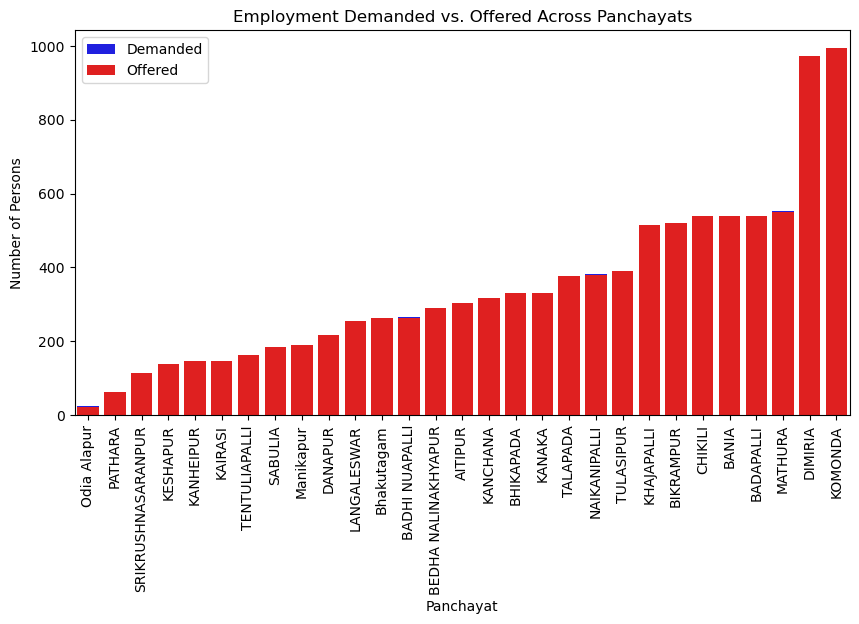

In [8]:
# Sort the DataFrame by "Employment demanded Persons"
df_sorted = df.sort_values(by="Employment demanded Persons", ascending=True)

plt.figure(figsize=(10,5 ))

# Plot the sorted data for 'Demanded'
sns.barplot(x="Panchayat", y="Employment demanded Persons", data=df_sorted, color="blue", label="Demanded")

# Plot the sorted data for 'Offered'
sns.barplot(x="Panchayat", y="Employment offered Persons", data=df_sorted, color="red", label="Offered")

plt.xticks(rotation=90)
plt.title("Employment Demanded vs. Offered Across Panchayats")
plt.xlabel("Panchayat")
plt.ylabel("Number of Persons")
plt.legend()
plt.show()

# Employment Availed Rate

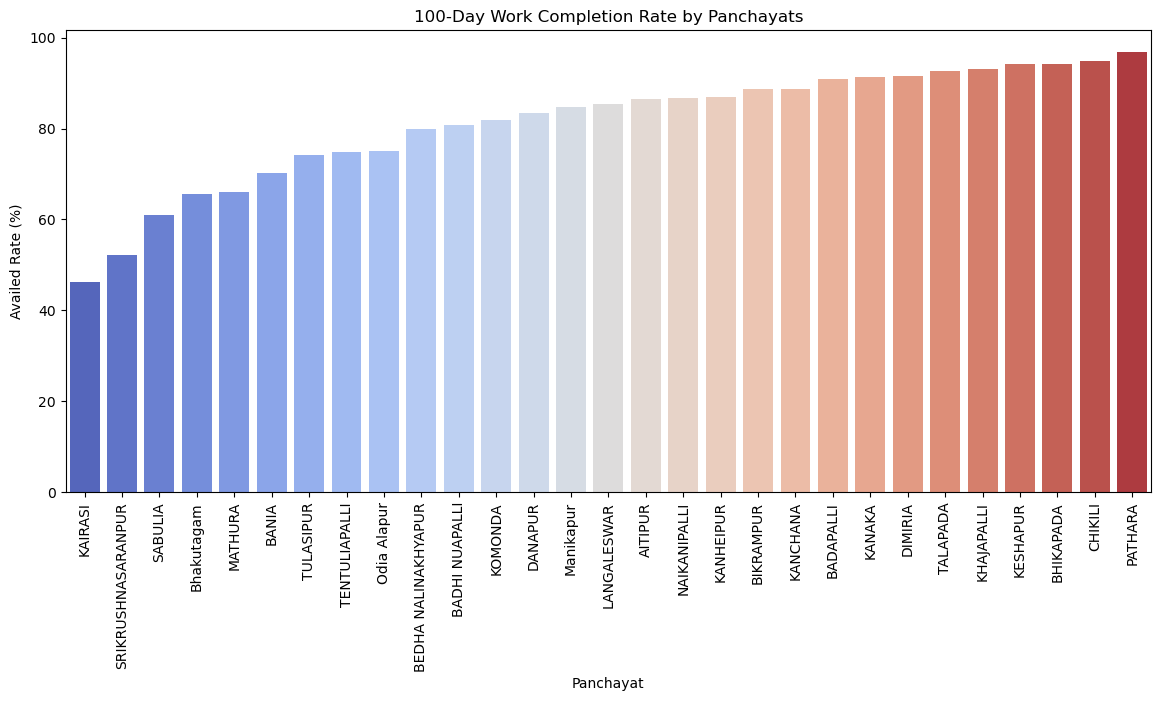

In [9]:
df["Availed Rate"] = (df["Employment Availed Persons"] / df["Employment demanded Persons"]) * 100
df_sorted = df.sort_values(by="Availed Rate", ascending=True)

plt.figure(figsize=(14, 6))
sns.barplot(x="Panchayat", y="Availed Rate", data=df_sorted, palette="coolwarm")

plt.xticks(rotation=90)
plt.title("100-Day Work Completion Rate by Panchayats")
plt.xlabel("Panchayat")
plt.ylabel("Availed Rate (%)")
plt.show()

# Cumulative Jobcard Issuance (SC/ST/Others)

<Figure size 1200x600 with 0 Axes>

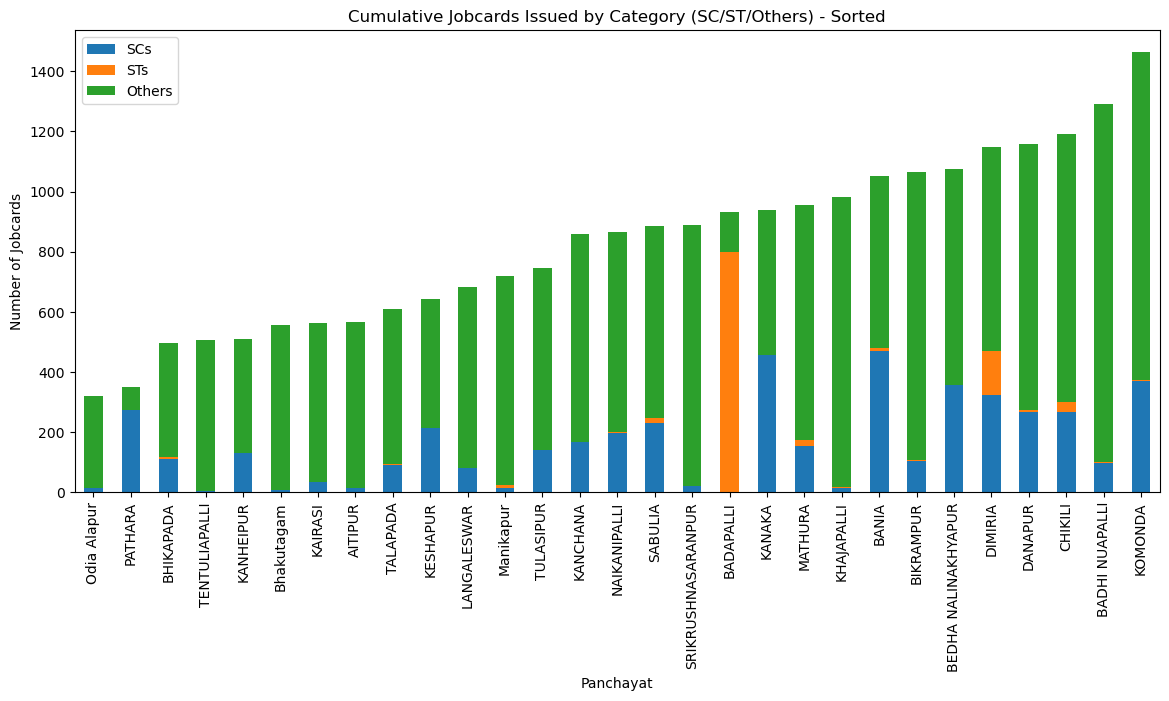

In [20]:
# Calculate total jobcards issued (SCs + STs + Others) for sorting
df["Total_Jobcards"] = (df["Cumulative No. of HH issued jobcards SCs"] + 
                        df["Cumulative No. of HH issued jobcards STs"] + 
                        df["Cumulative No. of HH issued jobcards Others"])

# Sort the DataFrame in ascending order
df_sorted = df.sort_values(by="Total_Jobcards", ascending=True)

# Plot the sorted DataFrame
plt.figure(figsize=(12, 6))
df_sorted[["Panchayat", "Cumulative No. of HH issued jobcards SCs", 
           "Cumulative No. of HH issued jobcards STs", 
           "Cumulative No. of HH issued jobcards Others"]].set_index("Panchayat").plot(
    kind="bar", stacked=True, figsize=(14, 6))

plt.title("Cumulative Jobcards Issued by Category (SC/ST/Others) - Sorted")
plt.ylabel("Number of Jobcards")
plt.xticks(rotation=90)
plt.legend(["SCs", "STs", "Others"])
plt.show()


# Households Completed 100 Days of Work

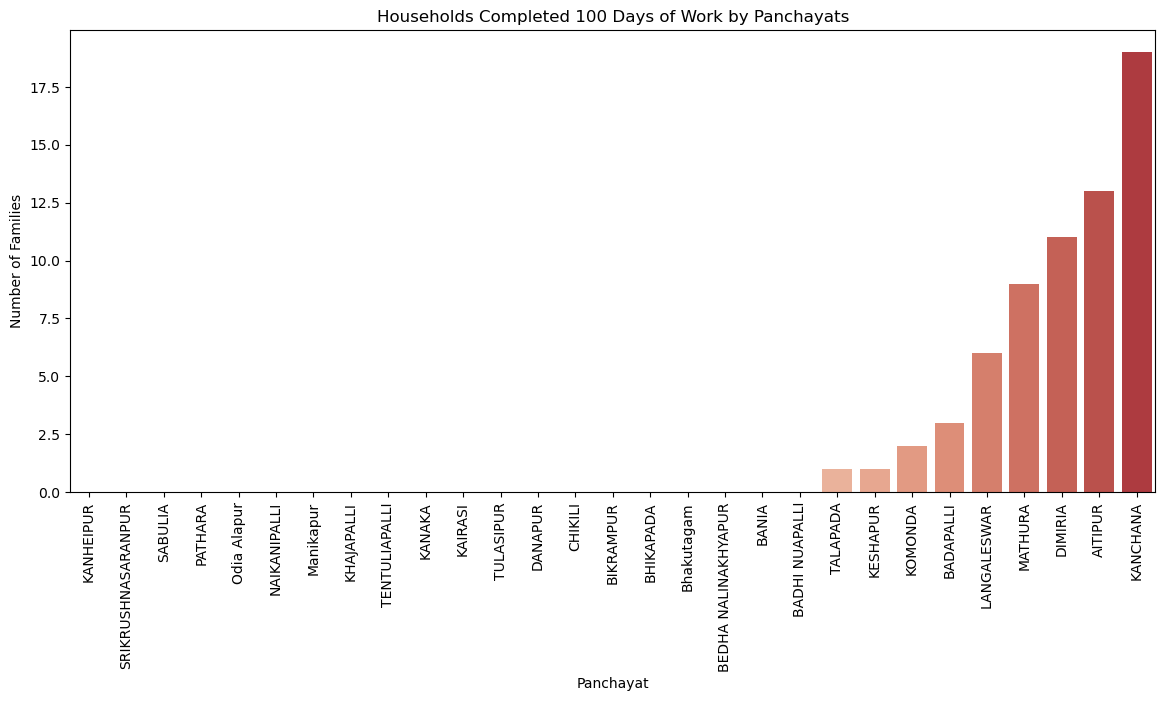

In [10]:
# Sort data in ascending order by "Families_Completed_100_Days"
df_sorted = df.sort_values(by="No. of Families Completed 100 days", ascending=True)


plt.figure(figsize=(14, 6))
sns.barplot(x="Panchayat", y="No. of Families Completed 100 days", data=df_sorted, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Households Completed 100 Days of Work by Panchayats")
plt.xlabel("Panchayat")
plt.ylabel("Number of Families")
plt.show()

# 100-Day Work Completion Rate

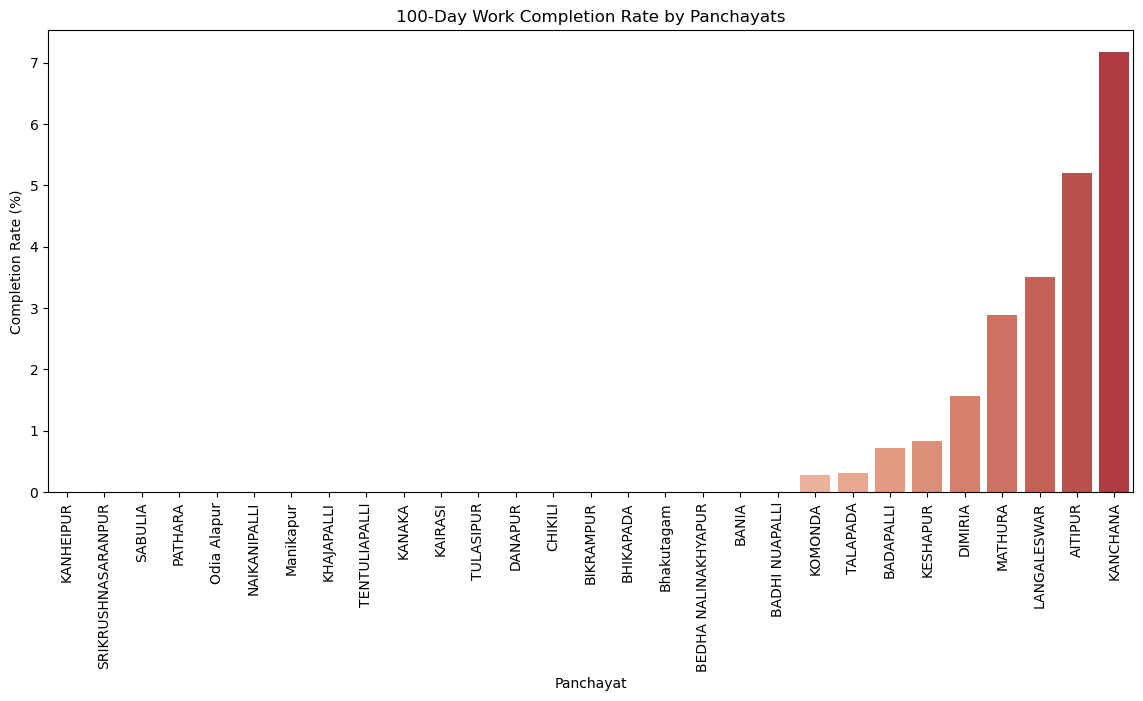

In [12]:
df["Completion Rate"] = (df["No. of Families Completed 100 days"] / df["Employment Availed Household"]) * 100
df_sorted = df.sort_values(by="Completion Rate", ascending=True)

plt.figure(figsize=(14, 6))
sns.barplot(x="Panchayat", y="Completion Rate", data=df_sorted, palette="coolwarm")

plt.xticks(rotation=90)
plt.title("100-Day Work Completion Rate by Panchayats")
plt.xlabel("Panchayat")
plt.ylabel("Completion Rate (%)")
plt.show()

# Employment Liability Centre vs State

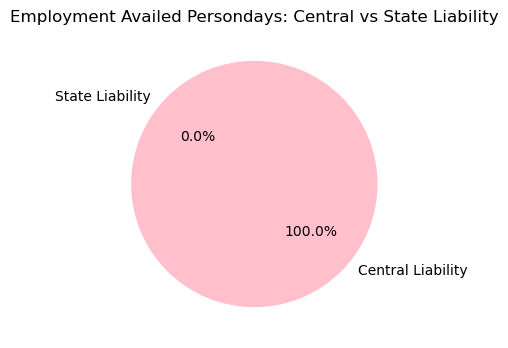

In [24]:
# Summing up the values for central and state liability
persondays_data = {
    'Central Liability': df['Employment Availed Persondays of Central Liability'].sum(),
    'State Liability': df['Employment Availed Persondays of States Liability'].sum()
}

# Extract labels and values
labels = persondays_data.keys()
values = persondays_data.values()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['pink', 'yellow'], startangle=140)

# Title
plt.title("Employment Availed Persondays: Central vs State Liability")
plt.show()

# Job Card Inclusion vs. Deletion

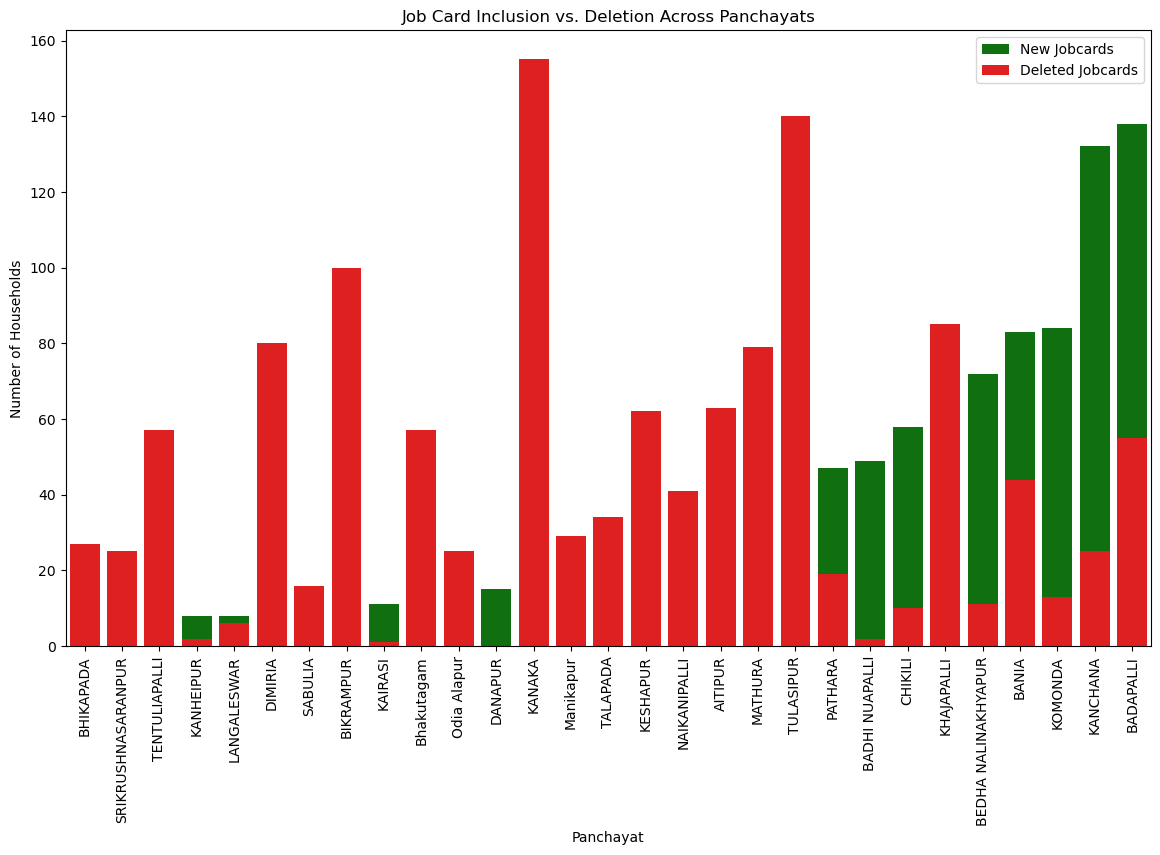

In [13]:
plt.figure(figsize=(14, 8))
df_sorted = df.sort_values(by="No. of Jobcard included in current YR Household", ascending=True)

sns.barplot(x="Panchayat", y="No. of Jobcard included in current YR Household", data=df_sorted, color="green",
            label="New Jobcards")
sns.barplot(x="Panchayat", y="No. of Jobcard deleted in current YR Household", data=df_sorted, color="red",
            label="Deleted Jobcards")

plt.xticks(rotation=90)
plt.title("Job Card Inclusion vs. Deletion Across Panchayats")
plt.xlabel("Panchayat")
plt.ylabel("Number of Households")
plt.legend()
plt.show()

# Top & Bottom Districts in Employment Availed

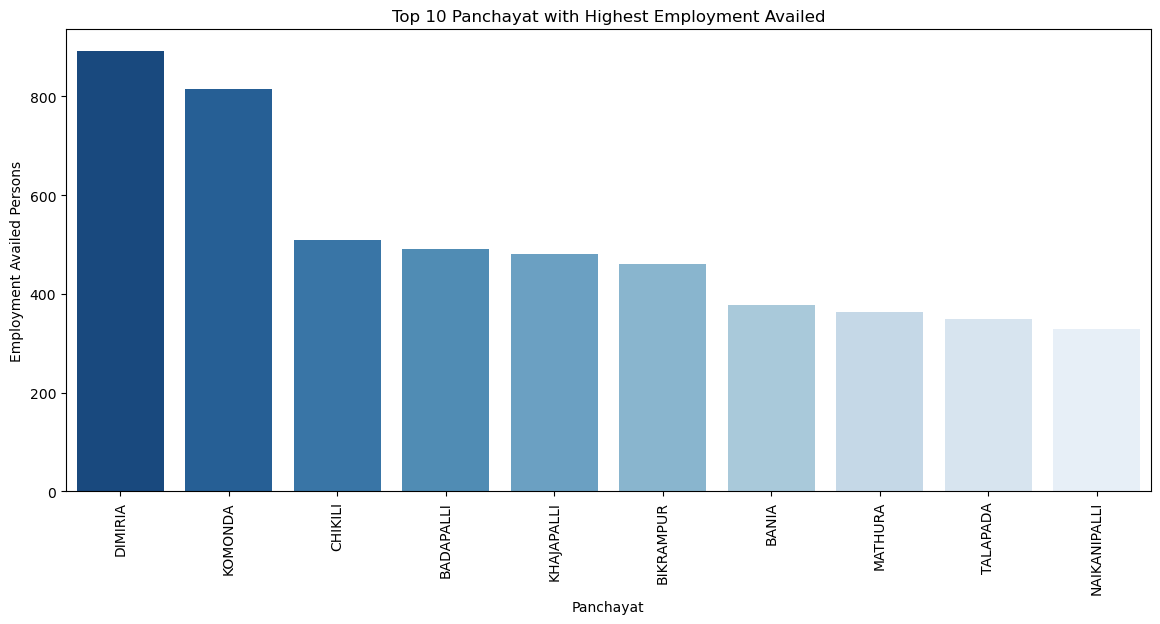

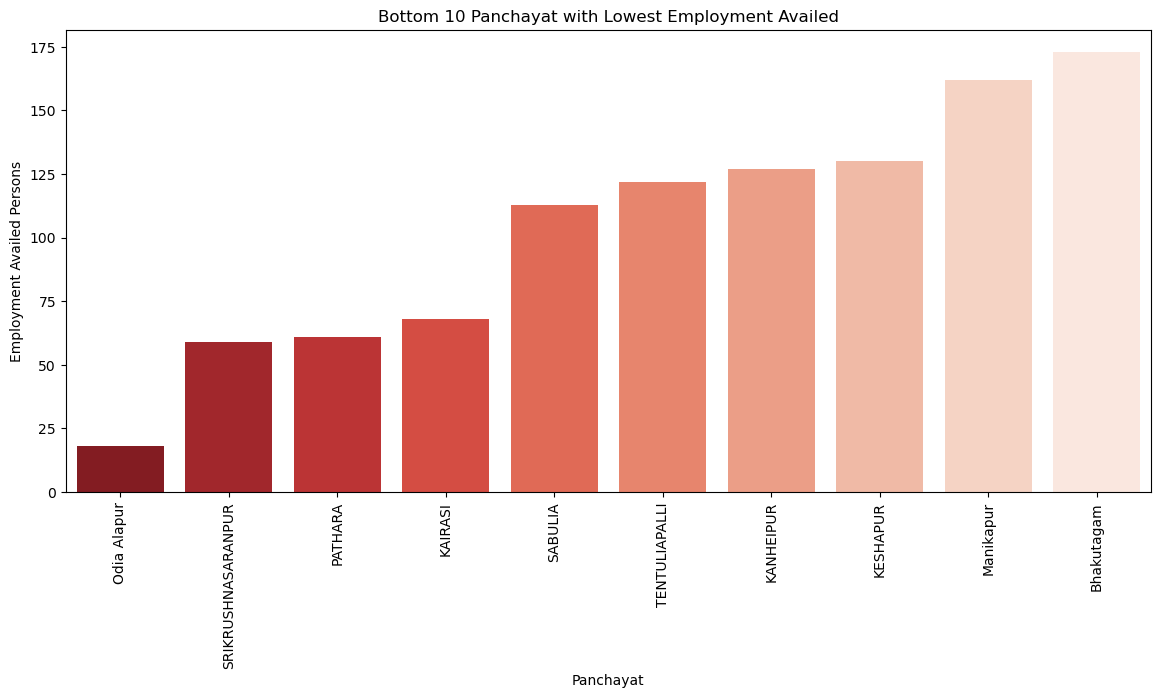

In [31]:
top_districts = df.nlargest(10, "Employment Availed Persons")
bottom_districts = df.nsmallest(10, "Employment Availed Persons")

plt.figure(figsize=(14, 6))
sns.barplot(x="Panchayat", y="Employment Availed Persons", data=top_districts, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Top 10 Panchayat with Highest Employment Availed")
plt.xlabel("Panchayat")
plt.ylabel("Employment Availed Persons")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x="Panchayat", y="Employment Availed Persons", data=bottom_districts, palette="Reds_r")
plt.xticks(rotation=90)
plt.title("Bottom 10 Panchayat with Lowest Employment Availed")
plt.xlabel("Panchayat")
plt.ylabel("Employment Availed Persons")
plt.show()


# Summing up the values for SCs, STs, and Others¶

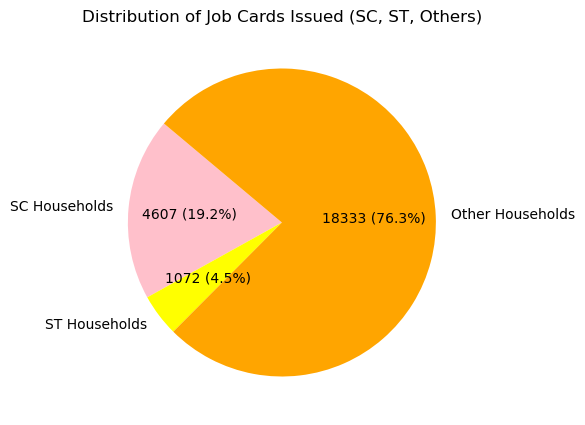

In [33]:
jobcard_data = {
    'SC Households': df['Cumulative No. of HH issued jobcards SCs'].sum(),
    'ST Households': df['Cumulative No. of HH issued jobcards STs'].sum(),
    'Other Households': df['Cumulative No. of HH issued jobcards Others'].sum()
}

# Extract labels and values
labels = jobcard_data.keys()
values = jobcard_data.values()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
#plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['blue', 'red', 'green'], startangle=140)
plt.pie(values, labels=labels, autopct=lambda pct: autopct_format(pct, values),
        colors=['pink', 'yellow', 'orange'], startangle=140)
# Title
plt.title("Distribution of Job Cards Issued (SC, ST, Others)")
plt.show()
